## Predict sentiment score of cryptocurrencies c with Fedot.Industrial

By combining historical sentiment data for 4 cryptocurrencies, extracted from EODHistoricalData31 and made available, with historical price data for the same cryptocurrencies, extracted from CryptoDataDownload32, was created the **BitcoinSentiment, EthereumSentiment, CardanoSentiment, and BinanceCoinSentiment** datasets, with 332, 356, 107, and 263 total instances, respectively. In all four datasets, the **predictors** are hourly **close price (in USD)** and **traded volume** for each respective cryptocurrency during a day, resulting in 2-dimensional time series of length 24. The **target variable** is the **normalized sentiment score** on the day spanned by the timepoints. The datasets were split
into train and test sets by randomly selecting 30% of each set as test data.
Link to the dataset - https://www.kaggle.com/datasets/gautamchettiar/historical-sentiment-data-btc-eth-bnb-ada

In [1]:
import pandas as pd
from fedot_ind.api.utils.path_lib import PROJECT_PATH

In [2]:
finetune = False
api_config = dict(problem='regression',
                             metric='rmse',
                             timeout=5,
                             n_jobs=-1,
                             with_tuning=finetune,
                             logging_level=10)
metric_list = ('r2', 'rmse', 'mae')
dataset_name = 'EthereumSentiment'
data_path = PROJECT_PATH + '/examples/data'

In [3]:
from fedot_ind.core.architecture.pipelines.abstract_pipeline import ApiTemplate
api_client = ApiTemplate(api_config=api_config,
                         metric_list=metric_list)

Next steps are quite straightforward. We need to fit the model and then predict the values for the test data just like for any other model in sklearn.

At the `fit` stage FedotIndustrial will transform initial time series data into features dataframe and will train regression model.

In [4]:
result_dict = api_client.eval(dataset=dataset_name, finetune=finetune)

Creating Dask Server
2024-07-08 17:38:30,773 - To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
2024-07-08 17:38:30,779 - State start
2024-07-08 17:38:32,046 -   Scheduler at: inproc://10.64.4.227/24216/1
2024-07-08 17:38:32,048 -   dashboard at:  http://10.64.4.227:59899/status
2024-07-08 17:38:32,048 - Registering Worker plugin shuffle
2024-07-08 17:38:33,330 -       Start worker at: inproc://10.64.4.227/24216/4
2024-07-08 17:38:33,331 -          Listening to:          inproc10.64.4.227
2024-07-08 17:38:33,332 -           Worker name:                          0
2024-07-08 17:38:33,333 -          dashboard at:          10.64.4.227:59900
2024-07-08 17:38:33,334 - Waiting to connect to: inproc://10.64.4.227/24216/1
2024-07-08 17:38:33,334 - -------------------------------------------------
2024-07-08 17:38:33,335 -               Threads:                          8
2024-07-08 17:38:33,335 -                Memory:  

Generations:   0%|          | 0/10000 [00:00<?, ?gen/s]

GraphVerifier - Graph verification failed with error <Invalid pipeline configuration: Pipeline has incorrect subgraph with identical data operations> for rule=<function has_no_conflicts_with_data_flow at 0x0000024A487CFB80> on graph=((/n_fourier_basis;)/n_quantile_extractor;;/n_quantile_extractor_{'window_size': 10, 'stride': 1, 'add_global_features': True};)/n_treg.
IndustrialDispatcher - Number of used CPU's: 8
PipelineObjectiveEvaluate - Pipeline (/n_fourier_basis;)/n_treg fit started
PipelineNode - Trying to fit pipeline node with operation: treg
PipelineNode - Fit all parent nodes in secondary node with operation: treg
PipelineNode - Trying to fit pipeline node with operation: fourier_basis
------------> onesided onesided
NFFT set to data length
------------> onesided onesided
NFFT set to data length
computing NSIG using AIC method
NSIG=4 found as the number of pertinent sinusoids
computing NSIG using AIC method
NSIG=4 found as the number of pertinent sinusoids
------------> onesi

Generations:   0%|          | 0/10000 [05:26<?, ?gen/s]

OptimisationTimer - Composition time: 5.441 min
OptimisationTimer - Algorithm was terminated due to processing time limit
IndustrialEvoOptimizer - Generation num: 2 size: 1
IndustrialEvoOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.238 node_number=0.200>']
IndustrialEvoOptimizer - no improvements for 1 iterations
IndustrialEvoOptimizer - spent time: 5.4 min
GPComposer - GP composition finished
ApiComposer - Model generation finished


PipelineNode - Trying to fit pipeline node with operation: treg
PipelineNode - Fit all parent nodes in secondary node with operation: treg
PipelineNode - Trying to fit pipeline node with operation: wavelet_basis
FEDOT logger - Final pipeline was fitted
FEDOT logger - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [treg, wavelet_basis]}
treg - {}
wavelet_basis - {}
MemoryAnalytics - Memory consumption for finish in main session: current 103.1 MiB, max: 108.9 MiB
PipelineNode - Obtain prediction in pipeline node by operation: treg
PipelineNode - Fit all parent nodes in secondary node with operation: treg
PipelineNode - Obtain prediction in pipeline node by operation: wavelet_basis
FEDOT logger - Predictions was saved in current directory.


In [5]:
result_dict['metrics']

,r2,rmse,mae
0,0.302,0.224,0.171


In [6]:
opt_hist = result_dict['industrial_model'].save_optimization_history(return_history=True)

2024-07-08 17:44:21,570 - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-07-08 17:44:21,571 - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-07-08 17:44:21,574 - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-07-08 17:44:21,575 - findfont: score(FontEntry(fname='C:\\Users\\user\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\fedot-ind-bTwQVkVM-py3.9\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2024-07-08 17:44:21,575 - findfont: score(FontEntry(fname='C:\\Users\\user\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\fedot-ind-bTwQVkVM-py3.9\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable'))

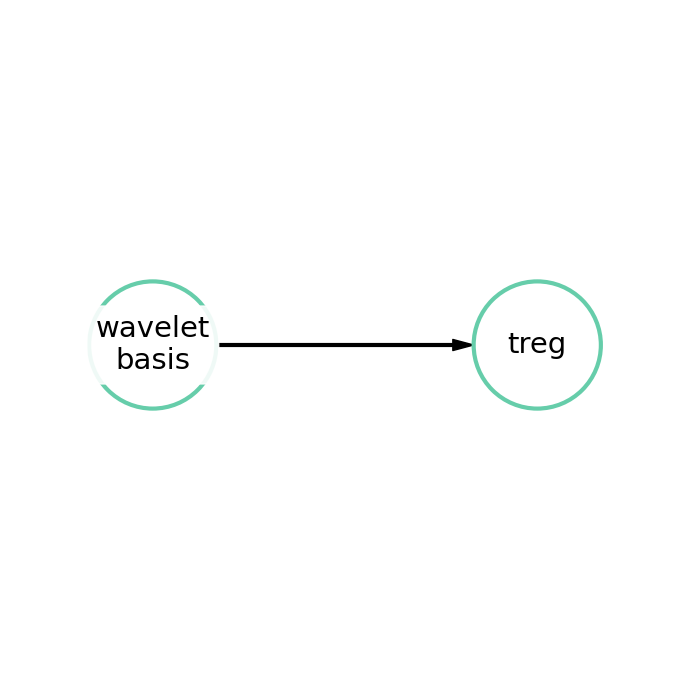

In [7]:
result_dict['industrial_model'].solver.current_pipeline.show()

In [19]:
opt_hist = result_dict['industrial_model'].vis_optimisation_history(
        opt_history_path=opt_hist,mode='fitness', return_history=True)

FitnessBox - Visualizing optimization history... It may take some time, depending on the history size.
2024-07-08 17:47:14,329 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-08 17:47:14,336 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
default - The figure was saved to "D:\WORK\Repo\Industiral\IndustrialTS\examples\real_world_examples\industrial_examples\criptocurrency_analysis\ts_regression\fitness_by_generation.png".


In [10]:
opt_hist = result_dict['industrial_model'].vis_optimisation_history(
        opt_history_path=opt_hist,mode='models', return_history=True)

OperationsAnimatedBar - Visualizing optimization history... It may take some time, depending on the history size.
2024-07-08 17:44:55,627 - locator: <matplotlib.ticker.AutoLocator object at 0x0000024A16A92700>
2024-07-08 17:44:55,682 - MovieWriter ffmpeg unavailable; using Pillow instead.
2024-07-08 17:44:55,683 - Animation.save using <class 'matplotlib.animation.PillowWriter'>
OperationsAnimatedBar - The animation was saved to "D:\WORK\Repo\Industiral\IndustrialTS\examples\real_world_examples\industrial_examples\criptocurrency_analysis\ts_regression\operations_animated_bar.gif".


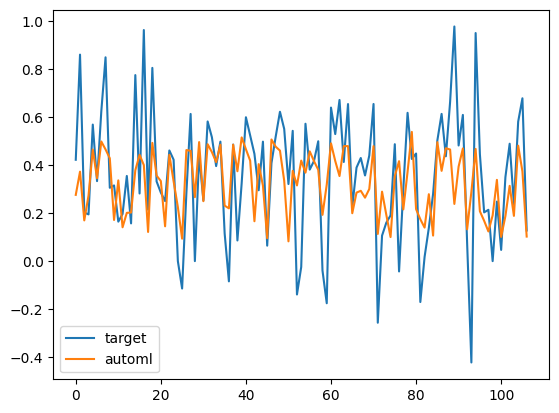

In [18]:
from matplotlib import pyplot as plt
import numpy as np

predictions = np.vstack([api_client.test_data[1].flatten(),result_dict['labels'].flatten()]).T
all_prediction = pd.DataFrame(predictions,columns=['target','automl'])
all_prediction.plot()
plt.show()

In [11]:
result_dict['industrial_model'].solver.return_report()

,days,hours,minutes,seconds,milliseconds
Data Definition (fit),0,0,0,0,0
Data Preprocessing,0,0,0,0,0
Fitting (summary),0,0,5,47,808
Composing,0,0,5,37,801
Train Inference,0,0,0,9,761
Tuning (composing),0,0,0,0,0
Tuning (after),0,0,0,0,0
Data Definition (predict),0,0,0,0,0
Predicting,0,0,0,0,91


## Compare with State of Art (SOTA) models

In [12]:
df = pd.read_csv(data_path+'/ts_regression_sota_results.csv',sep=';')
df = df[df['ds/type'] == dataset_name].iloc[:,:25]
df.index = df['algorithm']
df = df.drop(['algorithm','ds/type'], axis=1)
df = df.replace(',','.', regex=True).astype(float)

In [13]:
df['Fedot_Industrial_AutoML'] = result_dict['metrics']['rmse'][0]
df = df.T

In [14]:
df.sort_values('min')['min']

FreshPRINCE_RMSE           0.180515
DrCIF_RMSE                 0.180643
RotF_RMSE                  0.187496
RandF_RMSE                 0.193914
FPCR_RMSE                  0.195632
TSF_RMSE                   0.200847
FPCR-Bs_RMSE               0.201391
5NN-DTW_RMSE               0.205914
RDST_RMSE                  0.208743
Ridge_RMSE                 0.213185
5NN-ED_RMSE                0.215282
RIST_RMSE                  0.222417
FCN_RMSE                   0.222711
Fedot_Industrial_AutoML    0.224000
XGBoost_RMSE               0.224208
ResNet_RMSE                0.224795
InceptionT_RMSE            0.224887
MultiROCKET_RMSE           0.224921
SingleInception_RMSE       0.226110
Grid-SVR_RMSE              0.227387
CNN_RMSE                   0.234338
1NN-DTW_RMSE               0.255744
ROCKET_RMSE                0.257576
1NN-ED_RMSE                0.267144
Name: min, dtype: float64

In [15]:
df.sort_values('max')['max']

Fedot_Industrial_AutoML    0.224000
DrCIF_RMSE                 0.256310
RIST_RMSE                  0.256706
RandF_RMSE                 0.257411
RDST_RMSE                  0.257594
FreshPRINCE_RMSE           0.260502
RotF_RMSE                  0.263084
5NN-ED_RMSE                0.264245
FPCR_RMSE                  0.268228
5NN-DTW_RMSE               0.268344
TSF_RMSE                   0.269265
FPCR-Bs_RMSE               0.276976
XGBoost_RMSE               0.281631
InceptionT_RMSE            0.288174
Grid-SVR_RMSE              0.290551
MultiROCKET_RMSE           0.291900
FCN_RMSE                   0.295570
SingleInception_RMSE       0.296679
ResNet_RMSE                0.302419
Ridge_RMSE                 0.314523
ROCKET_RMSE                0.319622
CNN_RMSE                   0.348164
1NN-ED_RMSE                0.427555
1NN-DTW_RMSE               0.435497
Name: max, dtype: float64

In [16]:
df.sort_values('average')['average']

DrCIF_RMSE                 0.223448
Fedot_Industrial_AutoML    0.224000
FreshPRINCE_RMSE           0.225876
RotF_RMSE                  0.229423
FPCR_RMSE                  0.231336
RandF_RMSE                 0.233020
TSF_RMSE                   0.234477
FPCR-Bs_RMSE               0.235169
RDST_RMSE                  0.239879
RIST_RMSE                  0.241129
5NN-DTW_RMSE               0.241217
5NN-ED_RMSE                0.246046
MultiROCKET_RMSE           0.249028
InceptionT_RMSE            0.251960
XGBoost_RMSE               0.252351
FCN_RMSE                   0.252702
ResNet_RMSE                0.255854
Grid-SVR_RMSE              0.257539
SingleInception_RMSE       0.257753
Ridge_RMSE                 0.262168
CNN_RMSE                   0.271610
ROCKET_RMSE                0.287077
1NN-DTW_RMSE               0.318791
1NN-ED_RMSE                0.333878
Name: average, dtype: float64